# Exploring Venues for new Shopping Mall in New Delhi, India

## Table of Contents

* [Introduction](#introduction)
* [Data Collection](#data_collection)
* [Data Cleaning](#data_cleaning)
* [Analysis](#data_analysis)
* [Results](#result)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The scope of the project is to identify venues to open a new shopping mall in New Delhi, India. 

In this notebook, we will identify various venues in the city of **New Delhi, India** to help some who wants to open a new shopping mall across all major venues of the capital city of India. Data has been scrapped using **Wikipedia** and **Foursquare API**.

After analysing the venues data, we will cluster the data and select the best one or two cluster to open a new venture.

## Data Collection <a name="data_collection"></a>

Intially, we will get the list of major venues in New Delhi. For this we will exract the list from a wikipedia page where we have list of neighbourhood of the city.

Since we have only extracted the list of venues, we will require the lattitude and longitude corrdinates. We will use Nomatim and Geocoder libraries for this purpose.

Once we have the list of venues and their corrdinates, our next aim will be to locate the shopping malls across the city and for this purpose we will be using the Foursquare API.

In [1]:
#importing Libraries
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd

#### Getting the list of neighbourhood locations from Wikipedia using Beautiful Library

In [2]:
#Getting the data from url
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Delhi"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
l1=[]
table = soup.find_all('li')
for all in table:
    l1.append(all.text)

#Since our targeted list of values were 'Adarsh Nagar' to 'Viakspuri' so extracting those only.

ncr_df = pd.DataFrame({"Neighborhood": l1[l1.index('Adarsh Nagar'):l1.index('Vikaspuri')+1]})

print(ncr_df.shape)
ncr_df.head()

(118, 1)


,Neighborhood
0,Adarsh Nagar
1,Ashok Vihar
2,Begum Pur
3,Karala
4,Model Town


In [3]:
## Removing 'edit' phrase coming with data
#ncr_df=ncr_df[ncr_df['Neighborhood']!='edit']
#ncr_df.shape

In [4]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

#### Generating the Lattitude & Longitudes Corrdinates of each extracted venue

In [5]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, new Delhi, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in ncr_df["Neighborhood"].tolist() ]
coords

[[28.720350000000053, 77.17264000000006],
 [28.69037000000003, 77.17609000000004],
 [28.732620000000054, 77.05213000000003],
 [28.737330000000043, 77.03959000000003],
 [28.705010000000073, 77.18950000000007],
 [28.83979000000005, 77.07696000000004],
 [28.69590000000005, 77.13725000000005],
 [28.733560000000068, 77.10401000000007],
 [28.714230000000043, 77.15744000000007],
 [28.67671000000007, 77.21767000000006],
 [28.620430000000056, 77.04941000000008],
 [28.683760000000063, 77.20163000000008],
 [28.663950000000057, 77.23520000000008],
 [28.598039176797986, 77.12820592344048],
 [28.66366000000005, 77.22492000000005],
 [28.59051000000005, 77.12026000000003],
 [28.665830000000028, 77.18481000000008],
 [28.67557000000005, 77.16190000000006],
 [28.666000000000054, 77.21520000000004],
 [28.700780000000066, 77.22116000000005],
 [28.732790000000023, 77.22438000000005],
 [28.679040000000043, 77.31476000000004],
 [28.67369000000008, 77.28326000000004],
 [28.68249000000003, 77.25651000000005],
 

In [7]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

#### Merging the coordinates into the original dataframe

In [8]:
ncr_df['Latitude'] = df_coords['Latitude']
ncr_df['Longitude'] = df_coords['Longitude']

# check the neighborhoods and the coordinates
print(ncr_df.shape)
ncr_df.head(10)

(118, 3)


,Neighborhood,Latitude,Longitude
0,Adarsh Nagar,28.72035,77.17264
1,Ashok Vihar,28.69037,77.17609
2,Begum Pur,28.73262,77.05213
3,Karala,28.73733,77.03959
4,Model Town,28.70501,77.18950
5,Narela,28.83979,77.07696
6,Pitam Pura,28.69590,77.13725
7,Rohini Sub City,28.73356,77.10401
8,Shalimar Bagh,28.71423,77.15744
9,Civil Lines,28.67671,77.21767



#### Visualising the venues of New Delhi on the map

In [9]:
import folium
import json 
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Imported!")

Imported!


In [10]:
# New Delhi map

geolocator = Nominatim(user_agent="coursera")
address = 'New Delhi, India'
try:
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))
except AttributeError:
    print('Cannot find: {}, will drop index: {}'.format(address, index))

my_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ncr_df['Latitude'], ncr_df['Longitude'], ncr_df['Neighborhood']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(my_map)  
    
my_map

The geograpical coordinates of New Delhi, India are 28.6138954, 77.2090057.



## Data Cleaning <a name="data_cleaning"></a>

#### Exploring (Top 100) Venues (in 2000m radius) of each Neighbourhood in New Delhi

In [11]:
#Foursquare credentials

CLIENT_ID = 'C0Z2HZHMPCW25DGCQTZWAH3WUJKQG4DWRIRBKWQMTZX1KQMZ' # your Foursquare ID
CLIENT_SECRET = '4PVO3COGQKJCPMH1JWRNLF4C3TXEWEQD1OPTWPRYFPMZ2MLP' # your Foursquare Secret
ACCESS_TOKEN = 'E0PWSKQCE2YUYRHDICBHYIKVV22Y2X10EJ1KMXYJ0VOAHQNE' # your FourSquare Access Token
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: Hidden')
print('CLIENT_SECRET: Hidden')

Your credentails:
CLIENT_ID: Hidden
CLIENT_SECRET: Hidden


In [12]:
#Extracting venues

radius= 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(ncr_df['Latitude'], ncr_df['Longitude'], ncr_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [13]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(25)

(5161, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Adarsh Nagar,28.72035,77.17264,Shalimar bagh club,28.711882,77.157933,Indian Restaurant
1,Adarsh Nagar,28.72035,77.17264,Ever Bake,28.706419,77.162607,Bakery
2,Adarsh Nagar,28.72035,77.17264,Arjun Pao Bhaji,28.708468,77.184963,Indian Restaurant
3,Adarsh Nagar,28.72035,77.17264,Domino's Pizza,28.706000,77.163000,Pizza Place
4,Adarsh Nagar,28.72035,77.17264,Cafe Coffee Day,28.707934,77.161478,Coffee Shop
5,Adarsh Nagar,28.72035,77.17264,Jahangirpuri Metro Station | जहांगीरपुरी,28.726026,77.162626,Light Rail Station
6,Adarsh Nagar,28.72035,77.17264,Rameshwar Nagar Park,28.711492,77.181494,Park
7,Adarsh Nagar,28.72035,77.17264,Azadpur,28.708669,77.179102,Bus Station
8,Adarsh Nagar,28.72035,77.17264,Balsawa Golf Course,28.733304,77.183583,Golf Course
9,Adarsh Nagar,28.72035,77.17264,Shalimar Bagh Club,28.707351,77.161281,Hotel



## Data Analysis <a name="data_analysis"></a>

In [14]:
venues_df.groupby(['Neighborhood', 'VenueCategory']).count().head()

Latitude  Longitude  VenueName  VenueLatitude  \
Neighborhood VenueCategory                                                  
Adarsh Nagar Bakery                1          1          1              1   
             Bus Station           1          1          1              1   
             Coffee Shop           1          1          1              1   
             Golf Course           1          1          1              1   
             Hotel                 1          1          1              1   

                            VenueLongitude  
Neighborhood VenueCategory                  
Adarsh Nagar Bakery                      1  
             Bus Station                 1  
             Coffee Shop                 1  
             Golf Course                 1  
             Hotel                       1

In [15]:
venues_df.groupby(['Neighborhood','VenueCategory']).count().tail(10)

Latitude  Longitude  VenueName  \
Neighborhood VenueCategory                                                
Vivek Vihar  Track                              1          1          1   
Wazirabad    ATM                                1          1          1   
             Business Service                   1          1          1   
             Chinese Restaurant                 1          1          1   
Yamuna Vihar ATM                                3          3          3   
             Clothing Store                     1          1          1   
             Motorcycle Shop                    1          1          1   
             Park                               1          1          1   
             Pizza Place                        1          1          1   
             Tourist Information Center         1          1          1   

                                         VenueLatitude  VenueLongitude  
Neighborhood VenueCategory                                              
Vivek Vihar  Track                                   1               1  
Wazirabad    ATM                                     1               1  
             Business Service                        1               1  
             Chinese Restaurant                      1               1  
Yamuna Vihar ATM                                     3               3  
             Clothing Store                          1               1  
             Motorcycle Shop                         1               1  
             Park                                    1               1  
             Pizza Place                             1               1  
             Tourist Information Center              1               1

In [16]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 205 uniques categories.


#### Print out the frequncy distribution of each categories

In [17]:
#venues_df['VenueCategory'].unique()
venues_df['VenueCategory'].value_counts()

Indian Restaurant                  547
Café                               383
Coffee Shop                        315
Hotel                              250
Fast Food Restaurant               235
Pizza Place                        219
Restaurant                         168
Chinese Restaurant                 155
Market                             149
Italian Restaurant                 121
Bar                                110
Bakery                              95
Asian Restaurant                    95
Sandwich Place                      89
Donut Shop                          88
Lounge                              80
Park                                78
Dessert Shop                        77
Snack Place                         59
Light Rail Station                  54
Shopping Mall                       54
BBQ Joint                           50
Clothing Store                      47
Ice Cream Shop                      46
Multiplex                           43
Japanese Restaurant      


#### Analyzing each neighborhood

In [18]:
ncr_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ncr_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ncr_onehot.columns[-1]] + list(ncr_onehot.columns[:-1])
ncr_onehot = ncr_onehot[fixed_columns]

print(ncr_onehot.shape)
ncr_onehot.head()

(5161, 206)


,Neighborhoods,ATM,Accessories Store,Airport Food Court,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Center,Business Service,Cafeteria,Café,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Performing Arts Venue,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Punjabi Restaurant,Racetrack,Recreation Center,Resort,Restaurant,River,Road,Rock Club,Salad Place,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Zoo
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [19]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

ncr_grouped = ncr_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(ncr_grouped.shape)
ncr_grouped

(118, 206)


,Neighborhoods,ATM,Accessories Store,Airport Food Court,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Center,Business Service,Cafeteria,Café,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Performing Arts Venue,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Punjabi Restaurant,Racetrack,Recreation Center,Resort,Restaurant,River,Road,Rock Club,Salad Place,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Zoo
0,Adarsh Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [20]:
len(ncr_grouped[ncr_grouped["Shopping Mall"] > 0])

33

#### Creating a new DataFrame for Shopping Mall data only

In [21]:
ncr_mall = ncr_grouped[["Neighborhoods","Shopping Mall"]]
print(ncr_mall.shape)
ncr_mall.head()

(118, 2)


,Neighborhoods,Shopping Mall
0,Adarsh Nagar,0.000000
1,Alaknanda,0.000000
2,Anand Vihar,0.027027
3,Ashok Nagar,0.000000
4,Ashok Vihar,0.000000


#### Visualising the Number of Shopping Malls in each Neighborhood

Text(0, 0.5, 'Neighborhoods')

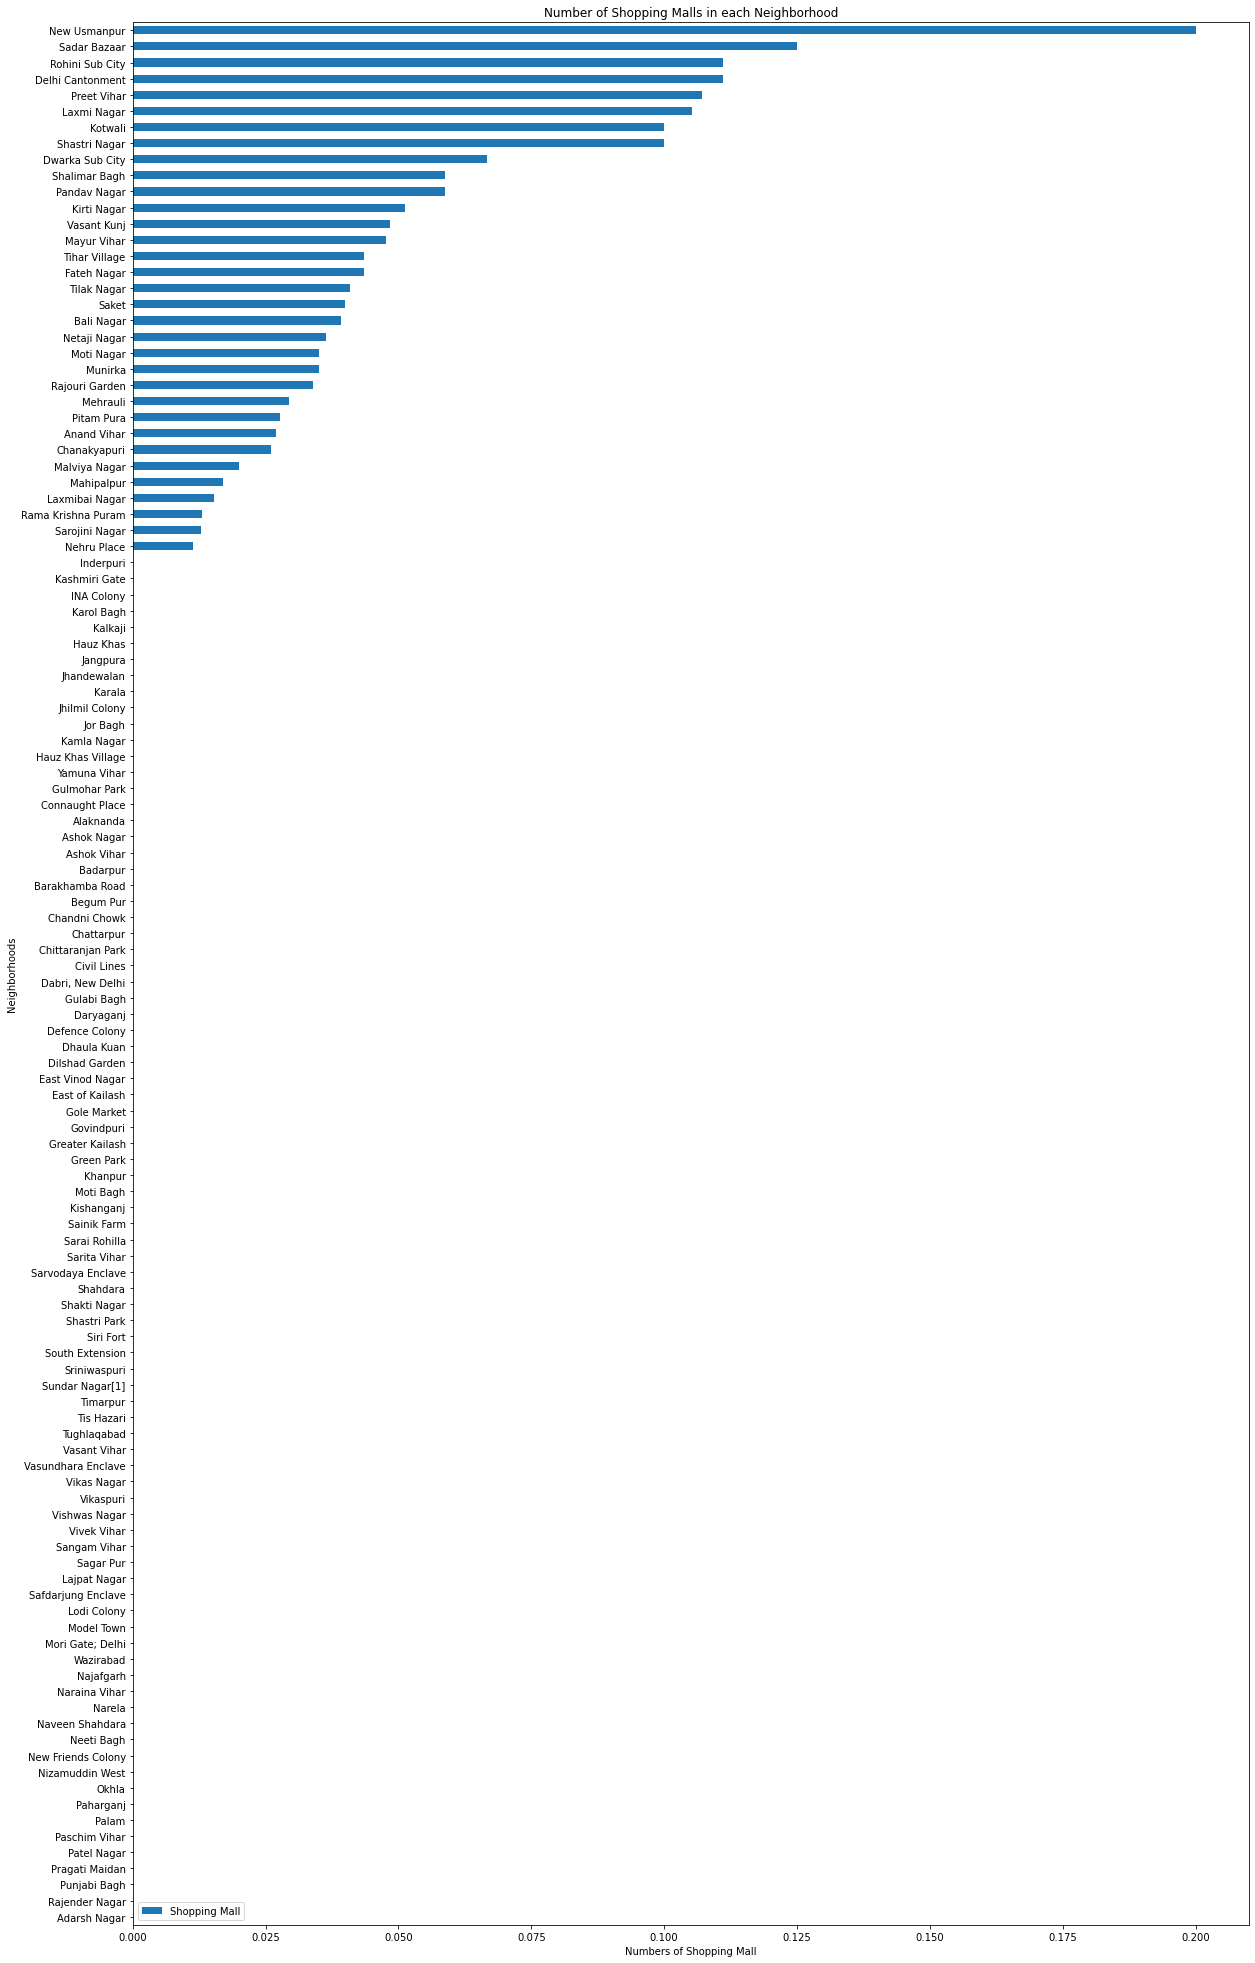

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ncr_mall_plot=ncr_mall.set_index('Neighborhoods',inplace=False).sort_values(by='Shopping Mall')
ncr_mall_plot.plot(kind="barh",figsize=(20,35))
#plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Number of Shopping Malls in each Neighborhood")
plt.xlabel("Numbers of Shopping Mall")
plt.ylabel("Neighborhoods")

#### Appying Clustering (KMeans here)

In [23]:
# set number of clusters
kclusters = 3

ncr_clustering = ncr_mall.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ncr_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

#### Adding clustering labels to the Shopping Mall Data

In [24]:
# create a new dataframe that includes the cluster for each neighborhood.
ncr_merged = ncr_mall.copy()

ncr_merged["Cluster Labels"] = kmeans.labels_

In [25]:
ncr_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
ncr_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,Adarsh Nagar,0.000000,0
1,Alaknanda,0.000000,0
2,Anand Vihar,0.027027,1
3,Ashok Nagar,0.000000,0
4,Ashok Vihar,0.000000,0


In [26]:
# merge ncr_grouped with ncr_data to add latitude/longitude for each neighborhood
ncr_merged = ncr_merged.join(ncr_df.set_index("Neighborhood"), on="Neighborhood")

print(ncr_merged.shape)
ncr_merged.head() # check the last columns!

(118, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Adarsh Nagar,0.000000,0,28.72035,77.17264
1,Alaknanda,0.000000,0,28.52567,77.25325
2,Anand Vihar,0.027027,1,28.65356,77.31373
3,Ashok Nagar,0.000000,0,28.69223,77.30124
4,Ashok Vihar,0.000000,0,28.69037,77.17609


#### Sorting the results by Cluster Labels

In [27]:
print(ncr_merged.shape)
ncr_merged.sort_values(["Cluster Labels"], inplace=True)
ncr_merged

(118, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Adarsh Nagar,0.000000,0,28.720350,77.172640
81,Rajender Nagar,0.000000,0,28.633505,77.173865
80,Punjabi Bagh,0.000000,0,28.666340,77.125000
78,Pragati Maidan,0.000000,0,28.612530,77.245090
76,Patel Nagar,0.000000,0,28.647830,77.164490
75,Paschim Vihar,0.000000,0,28.669330,77.091730
73,Palam,0.000000,0,28.591060,77.091170
72,Paharganj,0.000000,0,28.645960,77.214920
71,Okhla,0.000000,0,28.532470,77.278390
70,Nizamuddin West,0.000000,0,28.588650,77.244860


#### Visualising the resulting Clusters on Map

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ncr_merged['Latitude'], ncr_merged['Longitude'], ncr_merged['Neighborhood'], ncr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


## Results <a name="result"></a>

#### Examining Neighbourhood for Cluster 0

In [29]:
ncr_merged.loc[ncr_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Adarsh Nagar,0.000000,0,28.720350,77.172640
81,Rajender Nagar,0.000000,0,28.633505,77.173865
80,Punjabi Bagh,0.000000,0,28.666340,77.125000
78,Pragati Maidan,0.000000,0,28.612530,77.245090
76,Patel Nagar,0.000000,0,28.647830,77.164490
75,Paschim Vihar,0.000000,0,28.669330,77.091730
73,Palam,0.000000,0,28.591060,77.091170
72,Paharganj,0.000000,0,28.645960,77.214920
71,Okhla,0.000000,0,28.532470,77.278390
70,Nizamuddin West,0.000000,0,28.588650,77.244860


#### Examining Neighbourhood for Cluster 1

In [30]:
ncr_merged.loc[ncr_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
55,Mehrauli,0.029412,1,28.521130,77.180170
77,Pitam Pura,0.027778,1,28.695900,77.137250
9,Chanakyapuri,0.025974,1,28.595060,77.185730
105,Tilak Nagar,0.040816,1,28.640890,77.089220
104,Tihar Village,0.043478,1,28.635470,77.107780
24,Fateh Nagar,0.043478,1,28.631470,77.103160
59,Moti Nagar,0.035088,1,28.656720,77.129600
60,Munirka,0.035088,1,28.555040,77.171320
54,Mayur Vihar,0.047619,1,28.607714,77.290670
97,Shalimar Bagh,0.058824,1,28.714230,77.157440


#### Examining Neighbourhood for Cluster 2

In [31]:
ncr_merged.loc[ncr_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
47,Kotwali,0.100000,2,28.598039,77.128206
85,Sadar Bazaar,0.125000,2,28.590510,77.120260
69,New Usmanpur,0.200000,2,28.682490,77.256510
18,Delhi Cantonment,0.111111,2,28.591510,77.129450
49,Laxmi Nagar,0.105263,2,28.638750,77.275920
84,Rohini Sub City,0.111111,2,28.733560,77.104010
98,Shastri Nagar,0.100000,2,28.647520,77.270820
79,Preet Vihar,0.107143,2,28.639030,77.295970



## Conclusion <a name="conclusion"></a>

Most of the shopping malls are concentrated in neighbourhood listed under cluster 2 while moderate number in cluster 1. On the other hand, cluster 0 has almost no shopping mall in the neighborhoods. This represents a great opportunity and high potential areas to open new shopping malls as there is very little to no competition from existing malls. Meanwhile, shopping malls in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of shopping malls. 
From another perspective, this also shows that the oversupply of shopping malls mostly happened in the Cluster 2 areas, while cluster 1 areas still have few shopping malls. Therefore, this project recommends property developers to capitalize on these findings to open new shopping malls in neighborhoods in cluster 0 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods in cluster 1 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 2 which already have high concentration of shopping malls and suffering from intense competition.

**A project by Akshansh Dhama**

Still, there is much scope of improvment in this project, I have few other things in mind, will implement the same in near future for sure. You may further re-visit to check modifications. ***HAPPY LEARNING :)***